In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noornew22/new2/val/cysts/img-00001-00012 (2).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00008 (2).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00002 (4).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00008.bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00002 (2).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00001 (4).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00003 (6).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00005 (6).bmp
/kaggle/input/noornew22/new2/val/cysts/img-00001-00001.bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00003.bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00006 (2).bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00002 (10).bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00096.bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00001 (12).bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00017.bmp
/kaggle/input/noornew22/new2/val/stone/img-00001-00001 (11).bmp
/kaggle/i

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow import keras

In [3]:
trainpath = '../input/noornew22/new2/train'
testpath = '../input/noornew22/new2/test'
predpath = '../input/noornew22/new2/val'

In [4]:
for folder in  os.listdir(trainpath + '') : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.bmp'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 32 in folder cysts
For training data , found 49 in folder stone
For training data , found 114 in folder normal


In [5]:
for folder in  os.listdir(testpath +'') : 
    files = gb.glob(pathname= str( testpath +'//' + folder + '/*.bmp'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 5 in folder cysts
For testing data , found 8 in folder stone
For testing data , found 17 in folder normal


In [6]:
for folder in  os.listdir(predpath +'') : 
    files = gb.glob(pathname= str( predpath +'//' + folder + '/*.bmp'))
    print(f'For predication data , found {len(files)} in folder {folder}')

For predication data , found 9 in folder cysts
For predication data , found 14 in folder stone
For predication data , found 32 in folder normal


In [7]:
code = {'normal':0 ,'stone':1,'cysts':2}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [8]:
size = []
for folder in  os.listdir(trainpath +'') : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.bmp'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(423, 458, 3)    114
(418, 500, 3)     49
(429, 518, 3)     32
dtype: int64

In [9]:
size = []
for folder in  os.listdir(testpath +'') : 
    files = gb.glob(pathname= str( testpath +'//' + folder + '/*.bmp'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(423, 458, 3)    17
(418, 500, 3)     8
(429, 518, 3)     5
dtype: int64

In [10]:
size = []
for folder in  os.listdir(predpath +'') : 
    files = gb.glob(pathname= str( predpath +'//' + folder + '/*.bmp'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(423, 458, 3)    32
(418, 500, 3)    14
(429, 518, 3)     9
dtype: int64

In [11]:
s = 200

In [12]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'') : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.bmp'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [13]:
print(f'we have {len(X_train)} items in X_train')

we have 195 items in X_train


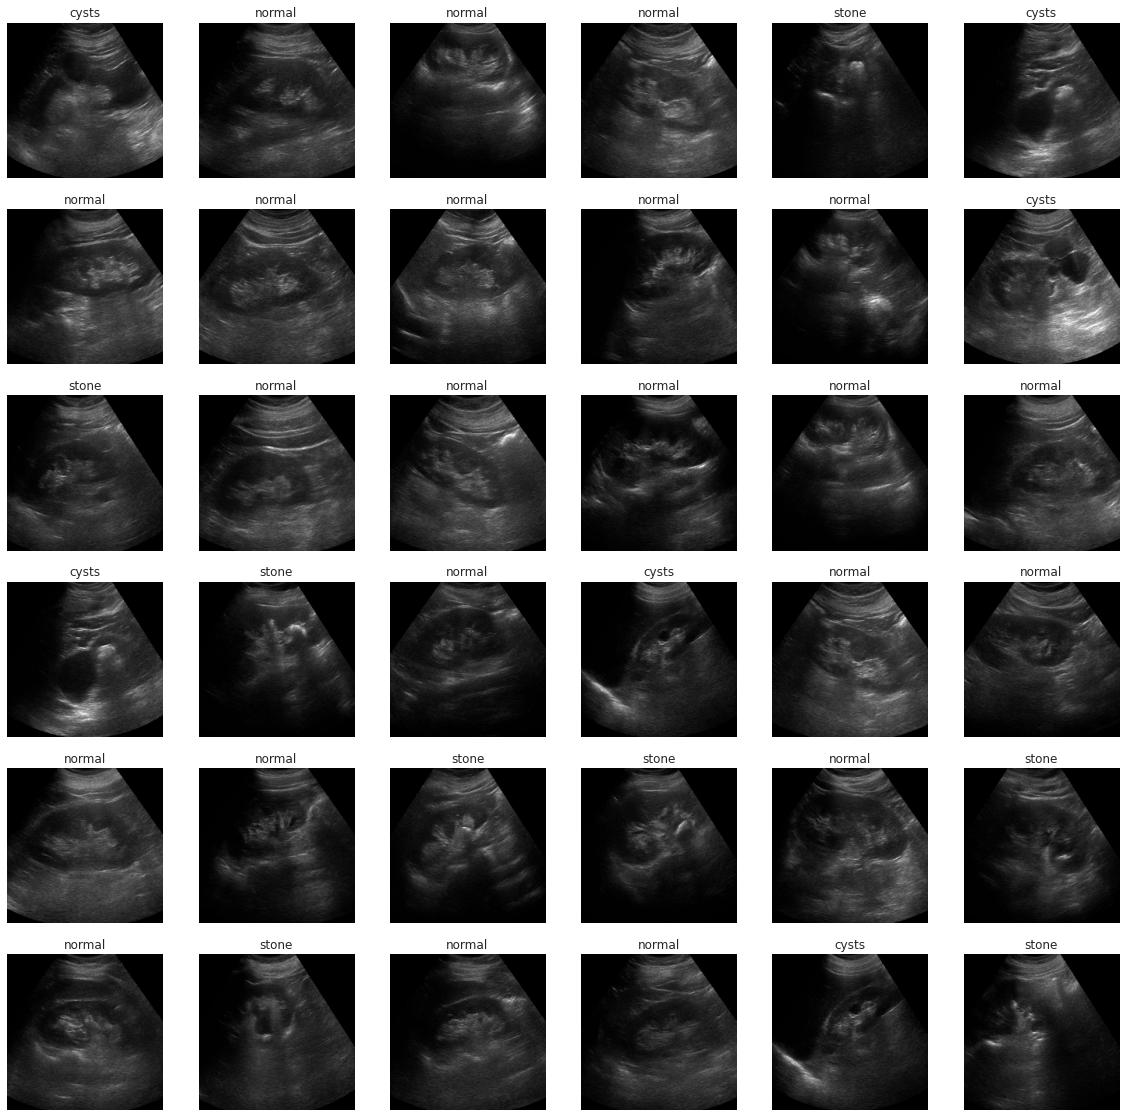

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [15]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'') : 
    files = gb.glob(pathname= str(testpath + '//' + folder + '/*.bmp'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [16]:
print(f'we have {len(X_test)} items in X_test')

we have 30 items in X_test


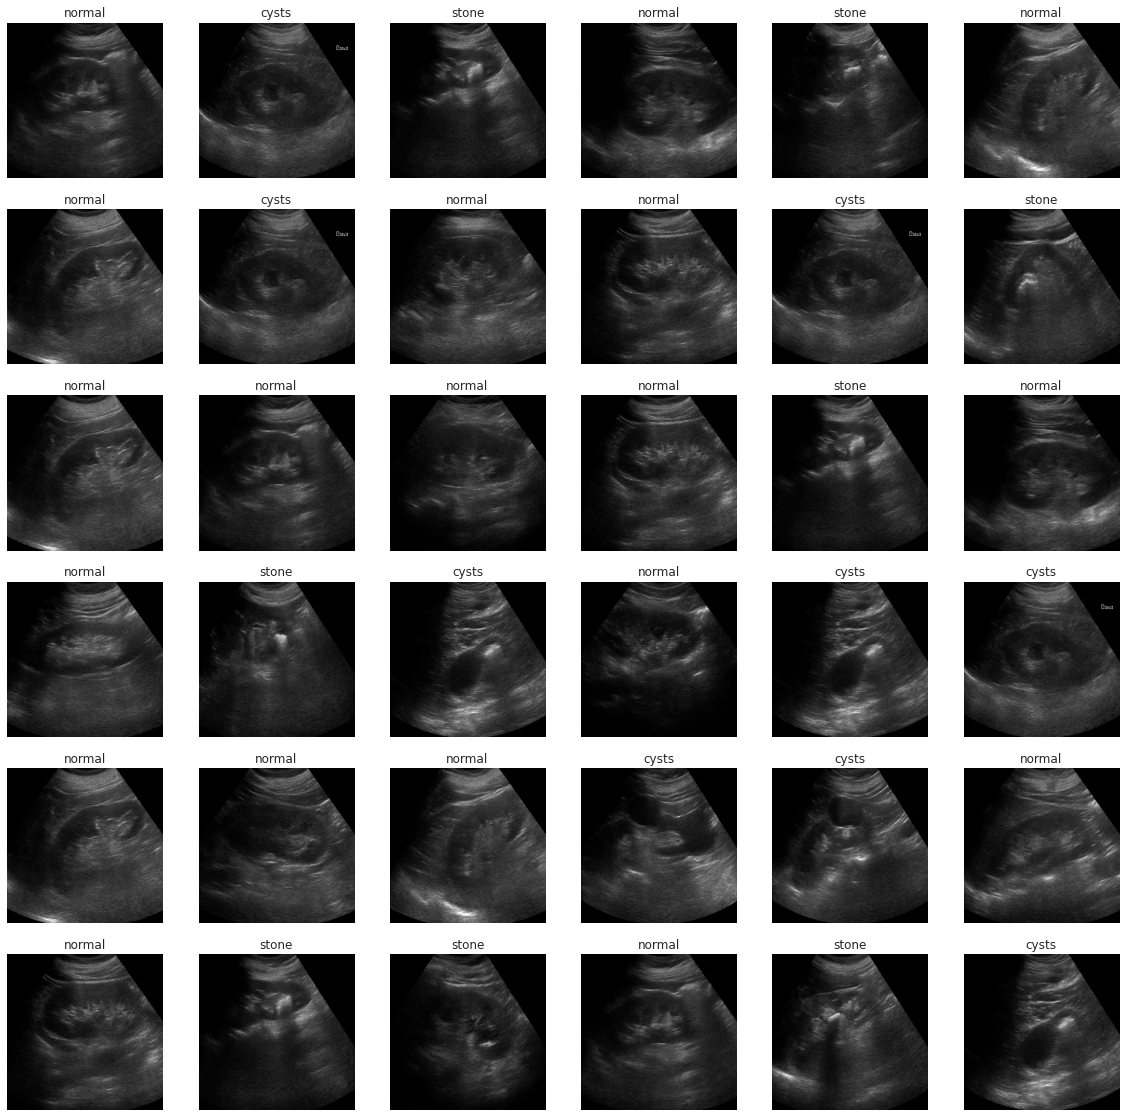

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [18]:
   X_pred = []

for folder in  os.listdir(predpath +'') : 
    files = gb.glob(pathname= str(predpath + '//' + folder + '/*.bmp'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_pred.append(list(image_array))

In [19]:
print(f'we have {len(X_pred)} items in X_pred')

we have 55 items in X_pred


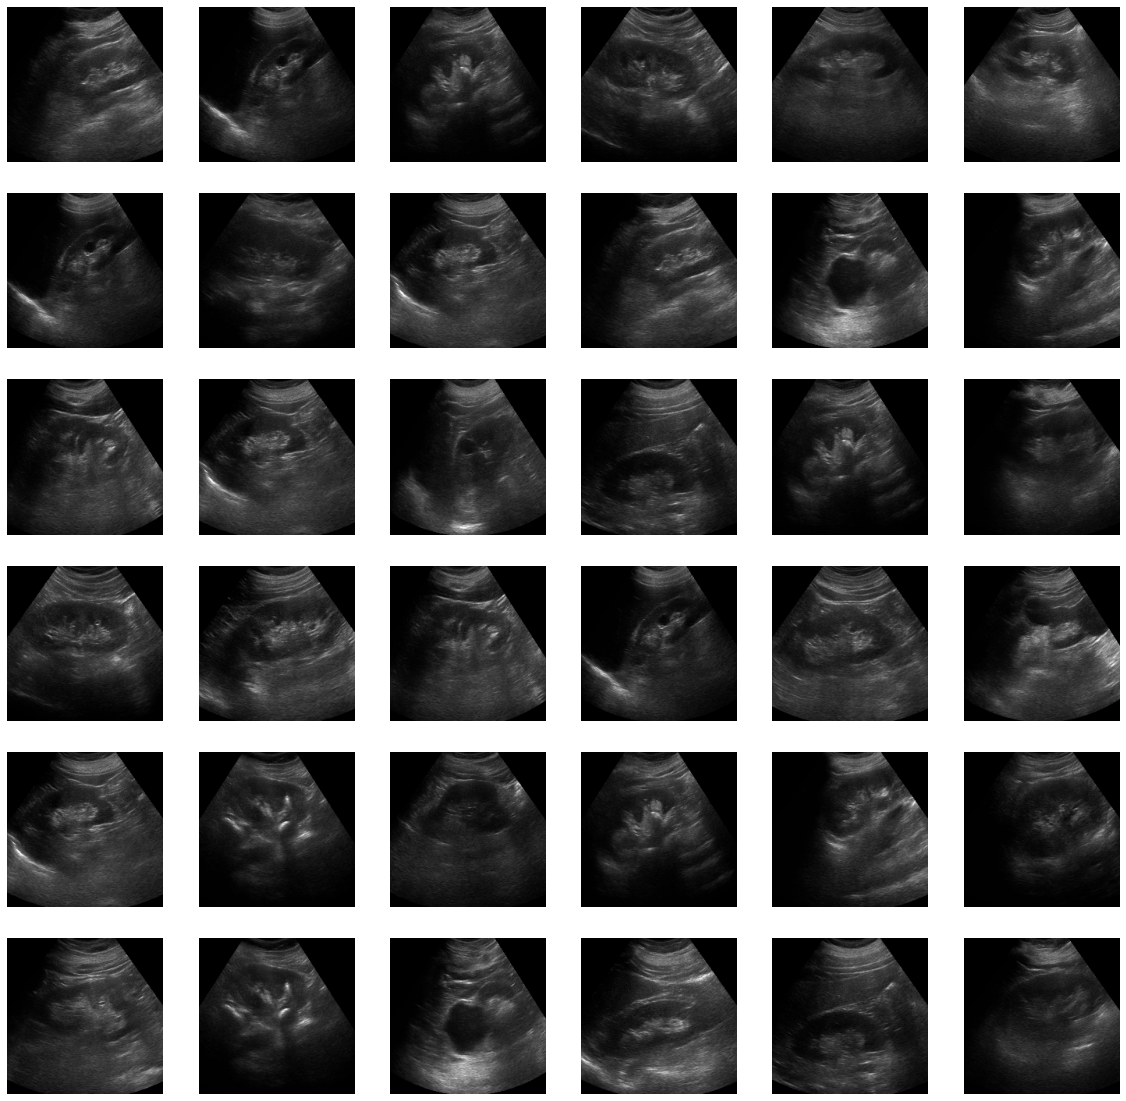

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (195, 200, 200, 3)
X_test shape  is (30, 200, 200, 3)
X_pred shape  is (55, 200, 200, 3)
y_train shape  is (195,)
y_test shape  is (30,)


In [22]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(3,activation='softmax') ,    
        ])


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'


In [23]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 150)     270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [25]:
epochs =10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

2022-02-04 17:40:04.236034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
4/4 [==============================] - 249s 55s/step - loss: 2.1348 - accuracy: 0.3897
Epoch 2/10
4/4 [==============================] - 250s 56s/step - loss: 1.0458 - accuracy: 0.5385
Epoch 3/10
4/4 [==============================] - 248s 56s/step - loss: 0.8360 - accuracy: 0.6308
Epoch 4/10
4/4 [==============================] - 248s 56s/step - loss: 0.6196 - accuracy: 0.7795
Epoch 5/10
4/4 [==============================] - 249s 56s/step - loss: 0.4026 - accuracy: 0.8462
Epoch 6/10
4/4 [==============================] - 250s 56s/step - loss: 0.2482 - accuracy: 0.9179
Epoch 7/10
4/4 [==============================] - 250s 56s/step - loss: 0.1053 - accuracy: 0.9744
Epoch 8/10
4/4 [==============================] - 251s 56s/step - loss: 0.0332 - accuracy: 0.9949
Epoch 9/10
4/4 [==============================] - 251s 56s/step - loss: 0.2472 - accuracy: 0.9538
Epoch 10/10
4/4 [==============================] - 255s 57s/step - loss: 0.1477 - accuracy: 0.9795


In [26]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1/1 [==============================] - 7s 7s/step - loss: 0.0196 - accuracy: 1.0000
Test Loss is 0.019593259319663048
Test Accuracy is 1.0


In [27]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (30, 3)


In [28]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (30, 3)


In [29]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (55, 3)


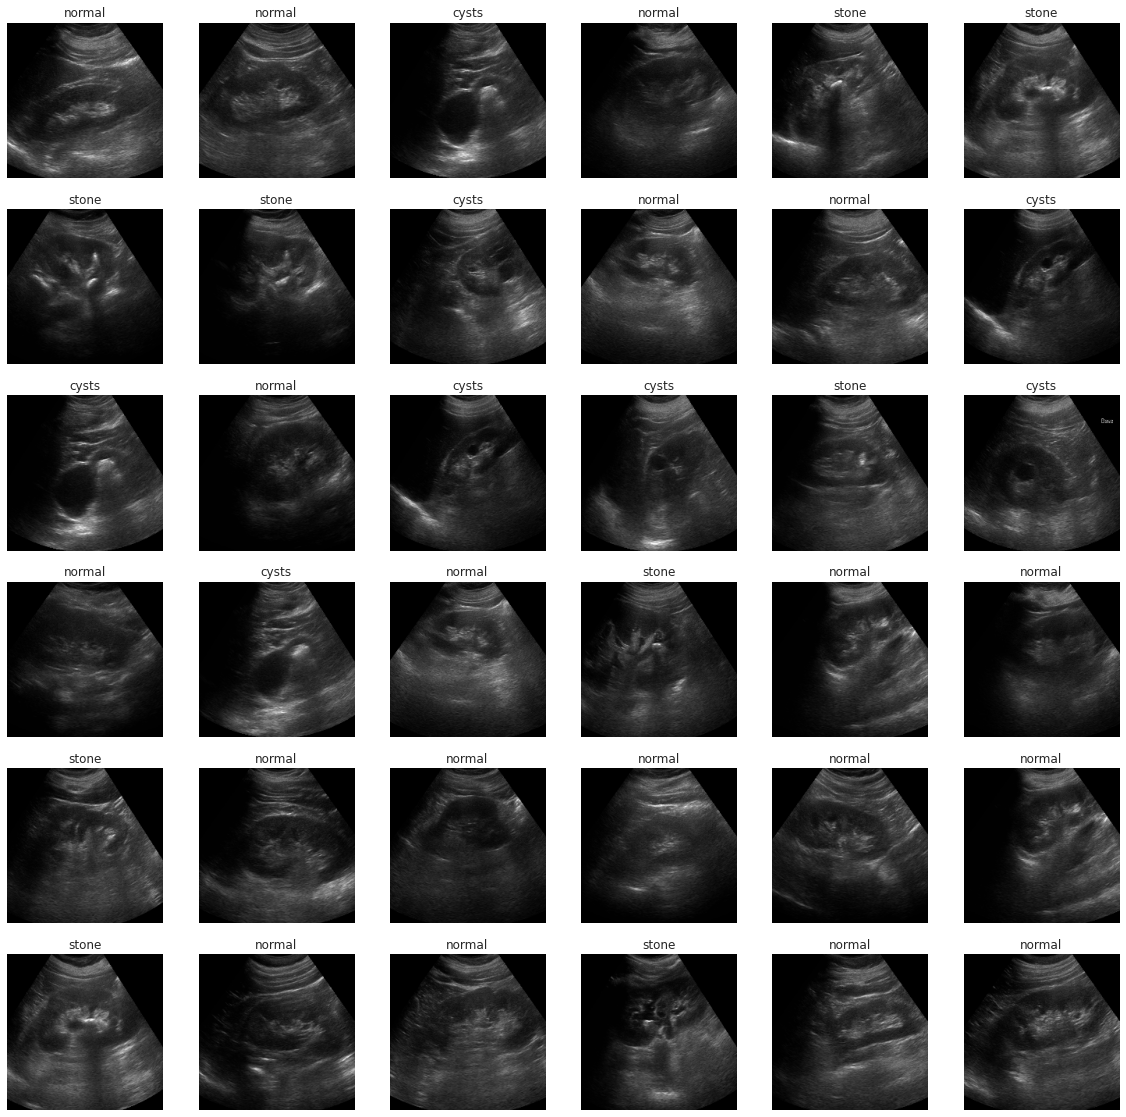

In [30]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))